# Telecom Churn Case Study

![](https://nextommerce.com/wp-content/uploads/2019/04/pasted-image-0-1024x513.png)

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this Telecom churn case study we are using Pareto principle which says that approximately 80% of revenue comes from the top 20% customers called high-value customers.

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data from the first three months. In churn prediction, I assume that there are three phases of customer lifecycle.

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase.

The ‘churn’ phase: In this phase, the customer is said to have churned.

We are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

### Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing all datasets
churn_data = pd.read_csv("../input/telecom-churn-data/telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Inspecting the Dataframe

In [4]:
churn_data.shape

(99999, 226)

In [5]:
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

### Data Preparation

In [6]:
churn_data.total_rech_amt_6.isnull().sum()/churn_data.shape[0]

0.0

In [7]:
churn_data.total_rech_amt_7.isnull().sum()/churn_data.shape[0]

0.0


#### There are no null records in above 2 columns

In [8]:
churn_data['average_good_phase'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7)/2

### Revenue Based Churn 

In [9]:
churn_data['average_good_phase'].describe(percentiles=[.70])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: average_good_phase, dtype: float64

In [10]:
data = churn_data[churn_data['average_good_phase'] >= 368.50 ]

#### Considering only those customers for whom total recharge amount during good phase is greater than 70th percentile of the total recharge amount

In [11]:
data.shape

(30011, 227)

### Usage Based Churn 

In [12]:
def churned_data(data):
    if ((data.total_ic_mou_9 == 0) & (data.total_og_mou_9 == 0) & (data.vol_2g_mb_9 == 0) & (data.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

data['Churn'] = data.apply(churned_data,axis=1)

In [13]:
(data['Churn'].sum()/data.shape[0])*100

8.64016527273333

#### So total 8.6% of high value customers are there which can churn 

In [14]:
# Removing the Churned phase columns
l = list(data.columns)
l = [x for x in l if x.endswith('_9')]
data.drop(l,axis=1,inplace=True)

In [15]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7  ...  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
7   1349.850  ...        NaN        NaN        NaN   802       57.74   
8    492.223  ...        NaN        1.0        1.0   315       21.03   
13   205.671  ...        NaN        NaN        1.0  2607        0.00   
16   299.869  ...        NaN        NaN        NaN   511        0.00   
17    18.980  ...        NaN        NaN        NaN   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  average_good_phase  Churn  
7        19.38       18.74         0.0              1185.0      1  
8       910.65      122.16         0.0               519.0      0  
13        0.00        0.00         0.0               380.0      0  
16        2.45       21.89         0.0               459.0      0  
17        0.00        0.00         0.0               408.0      0  

[5 rows x 174 columns]

### Removing unnecessary columns

In [16]:
data = data.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','onnet_mou_6','onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7','offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8','roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6','loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6','loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6','loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6','loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6', 'std_og_t2t_mou_7','std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7','std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7','std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6','isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7','spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8','loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8','loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8','loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8','loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7','std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6', 'ic_others_7', 'ic_others_8','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8','date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8','count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8','night_pck_user_6','night_pck_user_7', 'night_pck_user_8','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou','max_rech_amt_6','max_rech_amt_7', 'max_rech_amt_8','max_rech_data_6','max_rech_data_7', 'max_rech_data_8','average_good_phase','mobile_number'],axis=1)

In [17]:
data.head()

circle_id    arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
7         109  1069.180  1349.850  3171.480          487.53          609.24   
8         109   378.721   492.223   137.362          508.36          431.66   
13        109   492.846   205.671   593.260          907.09          192.41   
16        109   430.975   299.869   187.894          346.81          286.01   
17        109   690.008    18.980    25.499         1249.53            0.81   

    total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  ...  \
7           350.16          626.46          558.04          428.74  ...   
8           171.56          103.86           28.49           16.54  ...   
13         1015.26          968.61          172.58         1144.53  ...   
16          233.38          364.86          381.56          294.46  ...   
17            0.00           91.88            2.31            0.00  ...   

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
7             0        NaN        NaN        NaN   802       57.74   
8             0        NaN        1.0        1.0   315       21.03   
13            0        NaN        NaN        1.0  2607        0.00   
16            0        NaN        NaN        NaN   511        0.00   
17            0        NaN        NaN        NaN   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  Churn  
7        19.38       18.74         0.0      1  
8       910.65      122.16         0.0      0  
13        0.00        0.00         0.0      0  
16        2.45       21.89         0.0      0  
17        0.00        0.00         0.0      0  

[5 rows x 55 columns]

In [18]:
# Checking the percentage of missing values
((data.isnull().sum()/data.shape[0])*100)

circle_id              0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
total_og_mou_6         0.000000
total_og_mou_7         0.000000
total_og_mou_8         0.000000
total_ic_mou_6         0.000000
total_ic_mou_7         0.000000
total_ic_mou_8         0.000000
total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_data_6     62.023925
total_rech_data_7     61.140915
total_rech_data_8     60.834361
av_rech_amt_data_6    62.023925
av_rech_amt_data_7    61.140915
av_rech_amt_data_8    60.834361
vol_2g_mb_6            0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_8            0.000000
vol_3g_mb_6            0.000000
vol_3g_mb_7            0.000000
vol_3g_mb_8            0.000000
arpu_3g_6             62.023925
arpu_3g_7             61.140915
arpu_3g_8             60.834361
arpu_2g_

In [19]:
# Dropping columns with high missing value counts

data=data.drop(['total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8','arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],axis=1)

In [20]:
# Merging fb_user usage into new column and then dropping them

data.fb_user_678 = data.fb_user_6 + data.fb_user_7 + data.fb_user_8
data.fb_user_678.fillna(0,inplace=True)

data.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1,inplace=True)

In [21]:
data.head()

circle_id    arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
7         109  1069.180  1349.850  3171.480          487.53          609.24   
8         109   378.721   492.223   137.362          508.36          431.66   
13        109   492.846   205.671   593.260          907.09          192.41   
16        109   430.975   299.869   187.894          346.81          286.01   
17        109   690.008    18.980    25.499         1249.53            0.81   

    total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  ...  \
7           350.16          626.46          558.04          428.74  ...   
8           171.56          103.86           28.49           16.54  ...   
13         1015.26          968.61          172.58         1144.53  ...   
16          233.38          364.86          381.56          294.46  ...   
17            0.00           91.88            2.31            0.00  ...   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              0            0            0            0   802       57.74   
8              0            0            0            0   315       21.03   
13             0            0            0            0  2607        0.00   
16             0            0            0            0   511        0.00   
17             0            0            0            0   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  Churn  
7        19.38       18.74         0.0      1  
8       910.65      122.16         0.0      0  
13        0.00        0.00         0.0      0  
16        2.45       21.89         0.0      0  
17        0.00        0.00         0.0      0  

[5 rows x 40 columns]

### Test-Train Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variable to X
X = data.drop(['Churn'], axis=1)

X.head()

circle_id    arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
7         109  1069.180  1349.850  3171.480          487.53          609.24   
8         109   378.721   492.223   137.362          508.36          431.66   
13        109   492.846   205.671   593.260          907.09          192.41   
16        109   430.975   299.869   187.894          346.81          286.01   
17        109   690.008    18.980    25.499         1249.53            0.81   

    total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  ...  \
7           350.16          626.46          558.04          428.74  ...   
8           171.56          103.86           28.49           16.54  ...   
13         1015.26          968.61          172.58         1144.53  ...   
16          233.38          364.86          381.56          294.46  ...   
17            0.00           91.88            2.31            0.00  ...   

    monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  \
7              0             0            0            0            0   802   
8              0             0            0            0            0   315   
13             0             0            0            0            0  2607   
16             0             0            0            0            0   511   
17             0             0            0            0            0   667   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
7        57.74       19.38       18.74         0.0  
8        21.03      910.65      122.16         0.0  
13        0.00        0.00        0.00         0.0  
16        0.00        2.45       21.89         0.0  
17        0.00        0.00        0.00         0.0  

[5 rows x 39 columns]

In [24]:
# Putting response variable to y
y = data['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

# Logistic Regression

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

X_train[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']] = scaler.fit_transform(X_train[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']])

X_train.head()

circle_id    arpu_6    arpu_7    arpu_8  total_og_mou_6  \
76985        109 -0.294502 -0.677186  0.377798       -0.055406   
77814        109  0.400833  0.619258  0.283041        1.226553   
24787        109 -0.283474 -0.366902 -0.179113       -0.409039   
60192        109  0.227152  0.063942 -0.001397       -1.032216   
69896        109 -0.408561 -0.779160 -0.593971       -0.172128   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
76985        0.762233       -0.664375       -0.647448       -0.353714   
77814        1.211426        0.895504       -0.408888       -0.341712   
24787       -0.461212       -0.478354        0.302363        0.411161   
60192       -1.028296       -0.899262       -0.841760       -0.852679   
69896       -0.535469       -0.111665        0.635686        1.278729   

       total_ic_mou_8  ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
76985       -0.643769  ...             0             0            0   
77814       -0.318330  ...             0             0            0   
24787        0.311987  ...             0             0            0   
60192       -0.820718  ...             0             0           17   
69896        1.062278  ...             0             0            0   

       sachet_3g_7  sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
76985            0            0 -1.101010    0.430741   -0.331686   -0.307203   
77814            0            0 -0.830776   -0.331326   -0.331686   -0.307203   
24787            0            0  0.413940    0.195143    1.163080    1.378299   
60192           13           11  0.159060    1.172502    1.781146    0.723491   
69896            0            0 -0.901405   -0.331326   -0.331686   -0.307203   

       sep_vbc_3g  
76985   -0.138244  
77814   -0.138244  
24787   -0.138244  
60192   -0.138244  
69896   -0.138244  

[5 rows x 39 columns]

### Looking at Correlations

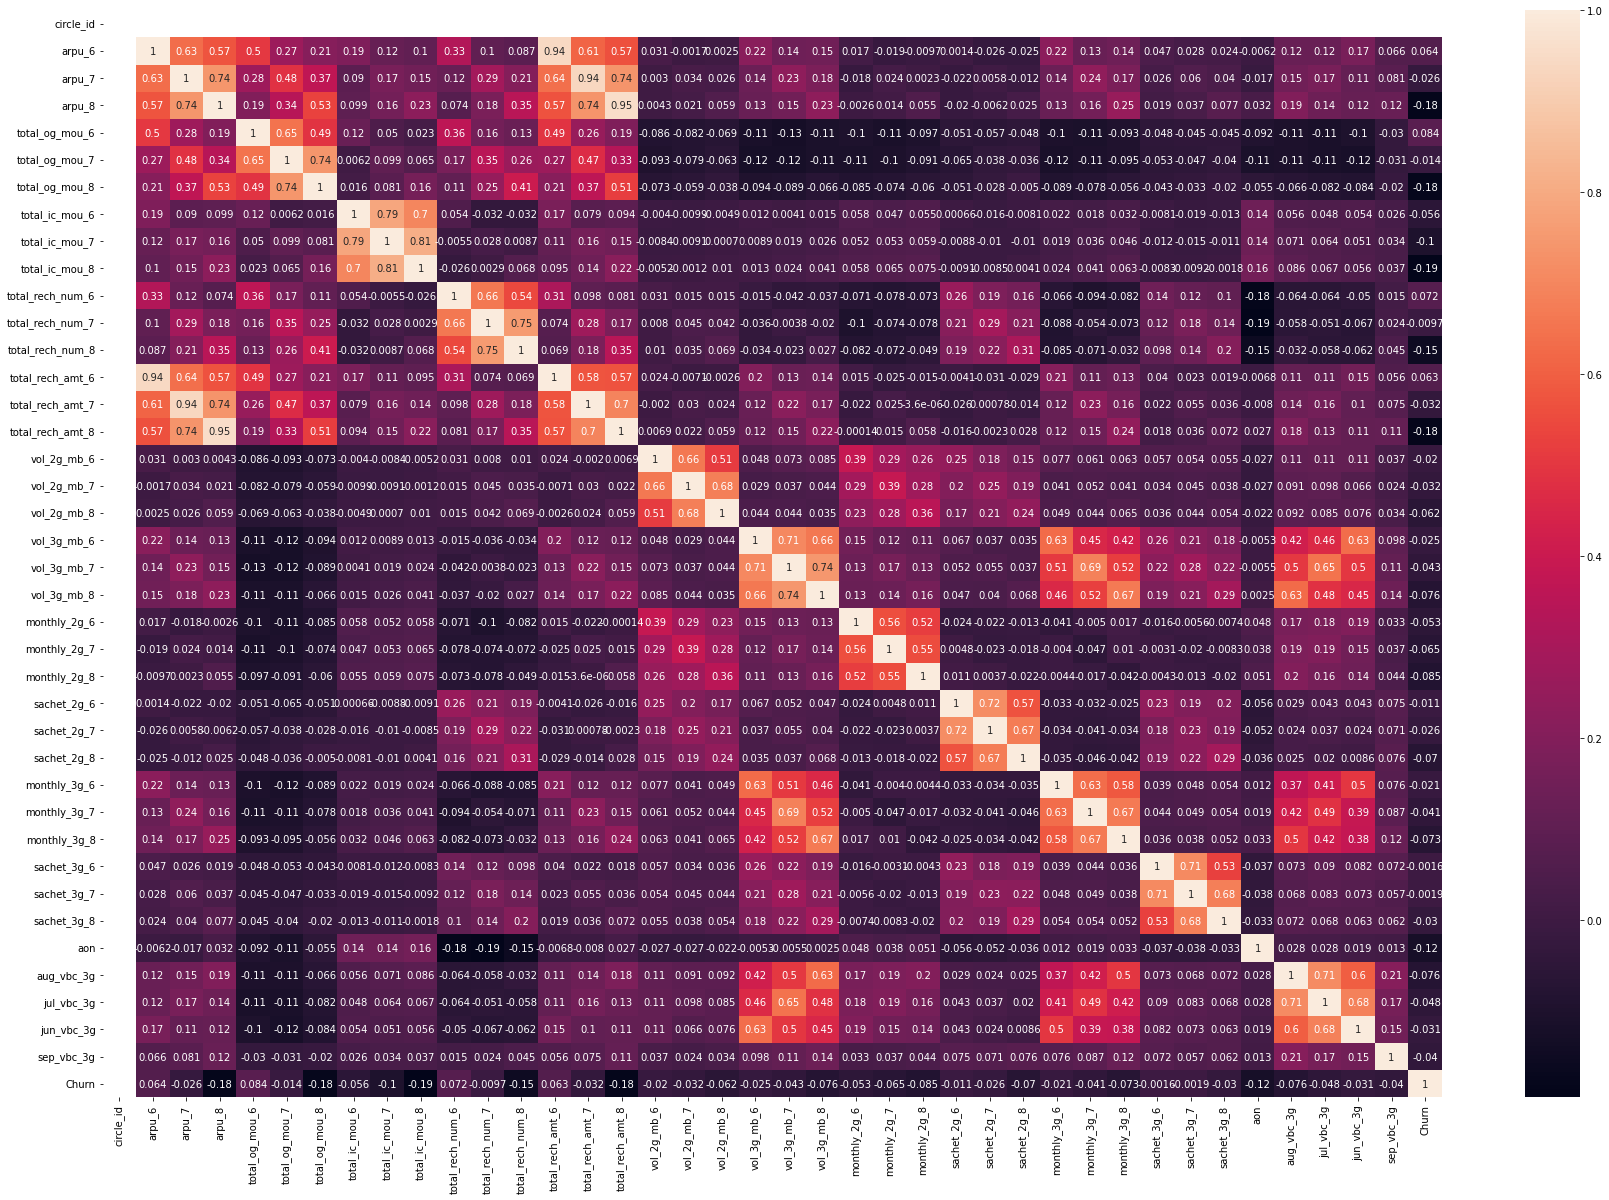

In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [29]:
# Dropping highly correlated columns to remove Multicollinearity
X_train = X_train.drop(['total_rech_amt_6', 'total_rech_amt_7','total_rech_amt_8'], 1)

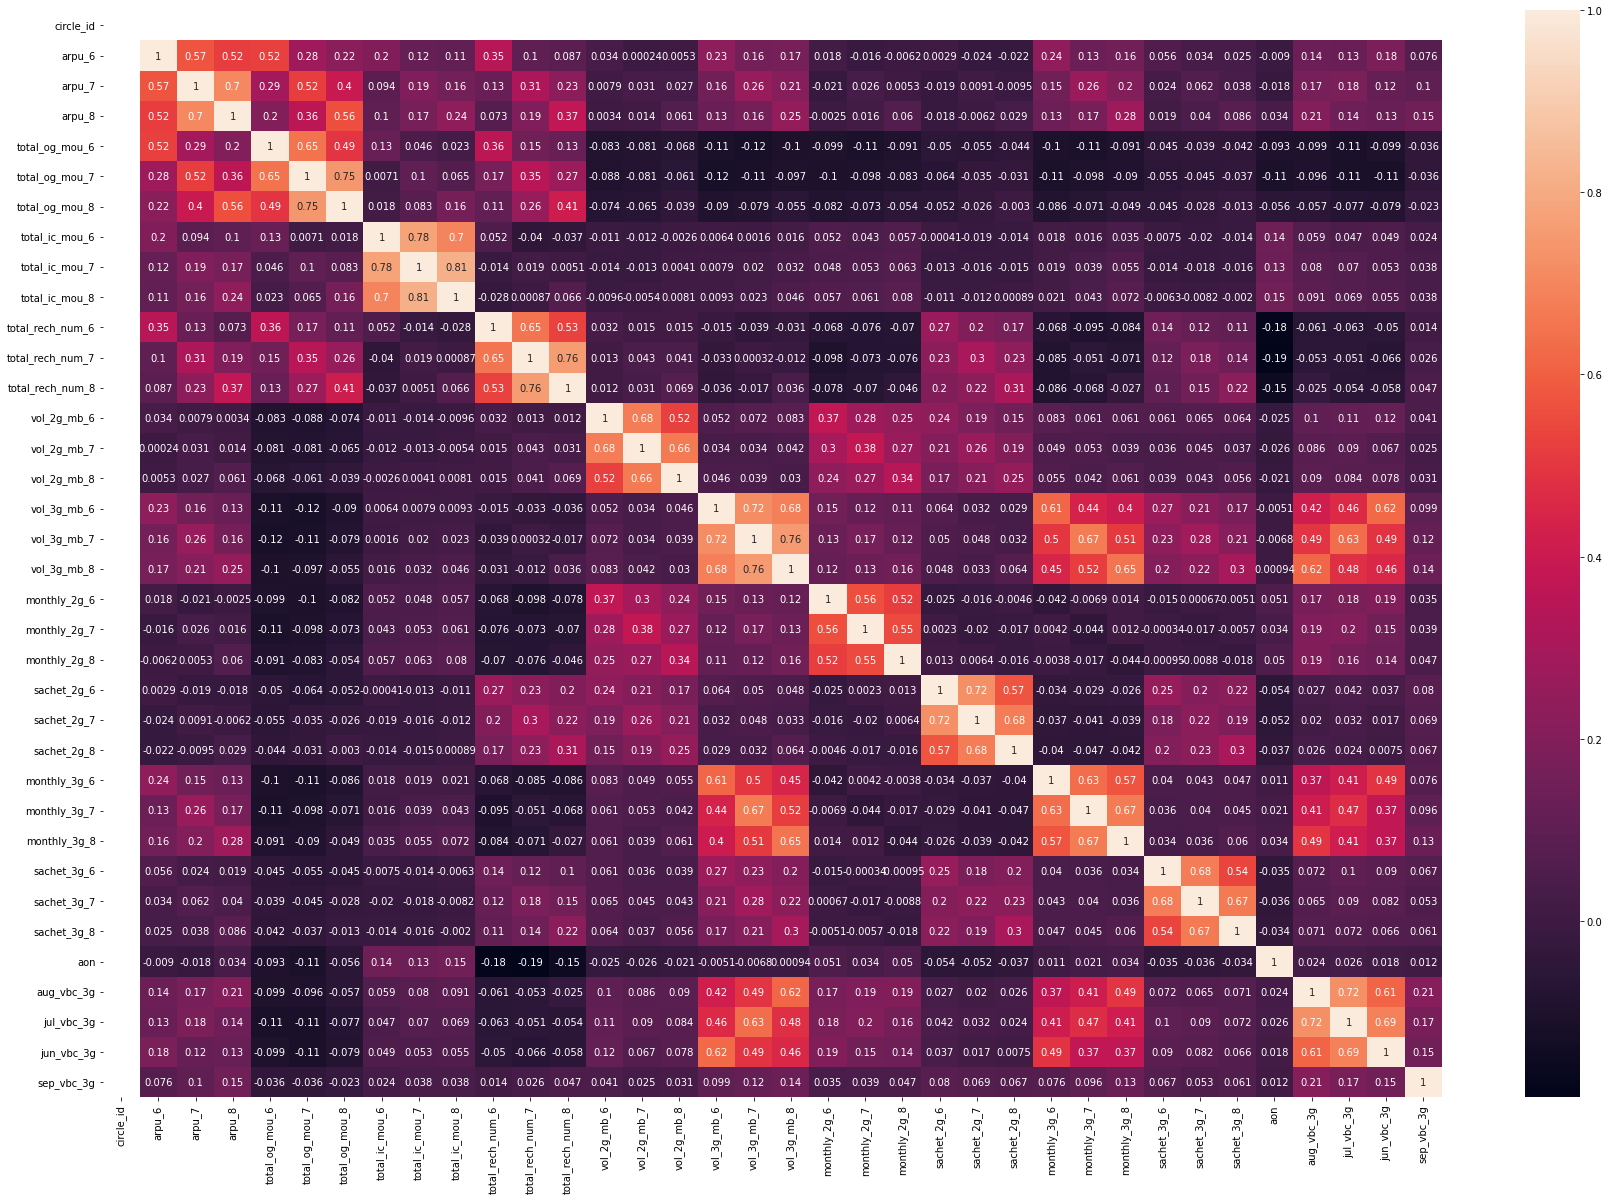

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building

In [31]:
import statsmodels.api as sm

In [32]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4131.1
Date:                Sat, 22 Jan 2022   Deviance:                       8262.1
Time:                        14:48:32   Pearson chi2:                 6.26e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
circle_id           -0.0341      0.001    -43.663      0.000      -0.036      -0.033
arpu_6               0.3245      0.052      6.296      0.000       0.223       0.425
arpu_7               0.2764      0.063      4.396      0.000       0.153       0.400
arpu_8              -0.4540      0.075     -6.015      0.000      -0.602      -0.306
total_og_mou_6       0.0080      0.046      0.172      0.863      -0.083       0.099
total_og_mou_7       0.1046      0.061      1.702      0.089      -0.016       0.225
total_og_mou_8      -0.7387      0.086     -8.543      0.000      -0.908      -0.569
total_ic_mou_6       0.1569      0.052      2.988      0.003       0.054       0.260
total_ic_mou_7       0.4417      0.073      6.024      0.000       0.298       0.585
total_ic_mou_8      -2.7902      0.136    -20.567      0.000      -3.056      -2.524
total_rech_num_6    -0.0308      0.038     -0.812      0.417      -0.105       0.043
total_rech_num_7     0.0719      0.056      1.291      0.197      -0.037       0.181
total_rech_num_8    -0.3831      0.072     -5.290      0.000      -0.525      -0.241
vol_2g_mb_6          0.0005      0.048      0.010      0.992      -0.093       0.094
vol_2g_mb_7          0.0387      0.053      0.734      0.463      -0.065       0.142
vol_2g_mb_8         -0.1781      0.089     -1.996      0.046      -0.353      -0.003
vol_3g_mb_6         -0.0434      0.063     -0.690      0.490      -0.167       0.080
vol_3g_mb_7          0.0957      0.083      1.157      0.247      -0.066       0.258
vol_3g_mb_8         -0.1110      0.098     -1.132      0.258      -0.303       0.081
monthly_2g_6        -0.1546      0.135     -1.146      0.252      -0.419       0.110
monthly_2g_7        -0.3121      0.144     -2.169      0.030      -0.594      -0.030
monthly_2g_8        -1.3005      0.240     -5.426      0.000      -1.770      -0.831
sachet_2g_6          0.0367      0.030      1.229      0.219      -0.022       0.095
sachet_2g_7          0.0194      0.030      0.636      0.525      -0.040       0.079
sachet_2g_8         -0.1992      0.044     -4.538      0.000      -0.285      -0.113
monthly_3g_6        -0.0463      0.099     -0.469      0.639      -0.240       0.147
monthly_3g_7        -0.1376      0.111     -1.239      0.215      -0.355       0.080
monthly_3g_8        -0.9357      0.187     -4.991      0.000      -1.303      -0.568
sachet_3g_6         -0.0011      0.062     -0.019      0.985      -0.122       0.120
sachet_3g_7          0.1028      0.057      1.813      0.070      -0.008       0.214
sachet_3g_8         -0.3116      0.121     -2.570      0.010      -0.549      -0.074
aon                 -0.3008      0.038     -8.002      0.000      -0.374      -0.227
aug_vbc_3g          -0.0139      0.076     -0.184      0.854      -0.162       0.134
jul_vbc_3g          -0.

### Feature Selection Using RFE

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [35]:
rfe.support_

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False,  True,  True, False, False, False,  True])

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 16),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('total_og_mou_6', False, 20),
 ('total_og_mou_7', False, 5),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_6', False, 17),
 ('total_rech_num_7', False, 10),
 ('total_rech_num_8', True, 1),
 ('vol_2g_mb_6', False, 22),
 ('vol_2g_mb_7', False, 12),
 ('vol_2g_mb_8', False, 2),
 ('vol_3g_mb_6', False, 15),
 ('vol_3g_mb_7', False, 11),
 ('vol_3g_mb_8', False, 7),
 ('monthly_2g_6', False, 3),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 13),
 ('sachet_2g_7', False, 18),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', False, 9),
 ('monthly_3g_7', False, 6),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_6', False, 21),
 ('sachet_3g_7', False, 4),
 ('sachet_3g_8', True, 1),
 ('aon', True, 1),
 ('aug_vbc_3g', False, 19),
 ('jul_vbc_3g', False, 14),
 ('jun_vbc_3g', False, 8),
 ('sep_vbc

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
X_train.columns[~rfe.support_]

Index(['circle_id', 'total_og_mou_6', 'total_og_mou_7', 'total_rech_num_6',
       'total_rech_num_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
       'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7',
       'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

#### Assessing the model with StatsModels

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4148.9
Date:                Sat, 22 Jan 2022   Deviance:                       8297.7
Time:                        14:48:39   Pearson chi2:                 2.86e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.6727      0.077    -47.940      0.000      -3.823      -3.523
arpu_6               0.3154      0.035      8.928      0.000       0.246       0.385
arpu_7               0.3855      0.045      8.514      0.000       0.297       0.474
arpu_8              -0.5569      0.065     -8.606      0.000      -0.684      -0.430
total_og_mou_8      -0.6364      0.067     -9.460      0.000      -0.768      -0.505
total_ic_mou_6       0.1499      0.051      2.915      0.004       0.049       0.251
total_ic_mou_7       0.4740      0.072      6.603      0.000       0.333       0.615
total_ic_mou_8      -2.8422      0.135    -21.128      0.000      -3.106      -2.579
total_rech_num_8    -0.3292      0.056     -5.854      0.000      -0.439      -0.219
monthly_2g_7        -0.3368      0.122     -2.765      0.006      -0.575      -0.098
monthly_2g_8        -1.5412      0.220     -7.016      0.000      -1.972      -1.111
sachet_2g_8         -0.1842      0.036     -5.095      0.000      -0.255      -0.113
monthly_3g_8        -1.2470      0.134     -9.320      0.000      -1.509      -0.985
sachet_3g_8         -0.2190      0.095     -2.300      0.021      -0.406      -0.032
aon                 -0.3093      0.037     -8.294      0.000      -0.382      -0.236
sep_vbc_3g          -0.9311      0.246     -3.785      0.000      -1.413      -0.449
====================================================================================
"""

In [40]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

76985    0.037510
77814    0.040300
24787    0.019944
60192    0.001279
69896    0.004366
15968    0.024650
10588    0.011035
70529    0.006189
72848    0.006748
2048     0.049989
dtype: float64

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [41]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
76985      0    0.037510   76985
77814      0    0.040300   77814
24787      0    0.019944   24787
60192      0    0.001279   60192
69896      0    0.004366   69896

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [42]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
76985      0    0.037510   76985          0
77814      0    0.040300   77814          0
24787      0    0.019944   24787          0
60192      0    0.001279   60192          0
69896      0    0.004366   69896          0

In [43]:
from sklearn import metrics

In [44]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18999   193]
 [ 1402   413]]


In [45]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9240729280715951


In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5     total_ic_mou_7  4.22
6     total_ic_mou_8  3.32
2             arpu_8  3.12
4     total_ic_mou_6  2.86
1             arpu_7  2.38
3     total_og_mou_8  1.73
0             arpu_6  1.70
8       monthly_2g_7  1.57
9       monthly_2g_8  1.57
7   total_rech_num_8  1.51
10       sachet_2g_8  1.23
11      monthly_3g_8  1.17
12       sachet_3g_8  1.16
13               aon  1.07
14        sep_vbc_3g  1.05

#### Plotting the ROC Curve

 An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.1

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

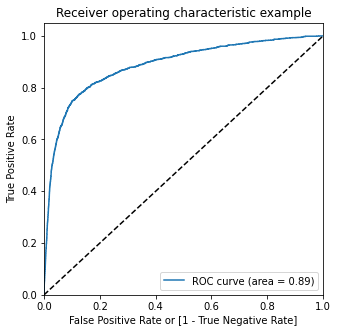

In [50]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [51]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
76985      0    0.037510   76985          0    1    0    0    0    0    0   
77814      0    0.040300   77814          0    1    0    0    0    0    0   
24787      0    0.019944   24787          0    1    0    0    0    0    0   
60192      0    0.001279   60192          0    1    0    0    0    0    0   
69896      0    0.004366   69896          0    1    0    0    0    0    0   

       0.6  0.7  0.8  0.9  
76985    0    0    0    0  
77814    0    0    0    0  
24787    0    0    0    0  
60192    0    0    0    0  
69896    0    0    0    0

In [52]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.817013  0.819835  0.816747
0.2   0.2  0.900271  0.709642  0.918299
0.3   0.3  0.923644  0.597796  0.954460
0.4   0.4  0.930595  0.458953  0.975198
0.5   0.5  0.924073  0.227548  0.989944
0.6   0.6  0.919789  0.119559  0.995467
0.7   0.7  0.917266  0.063361  0.998020
0.8   0.8  0.915980  0.034711  0.999323
0.9   0.9  0.914933  0.017631  0.999792


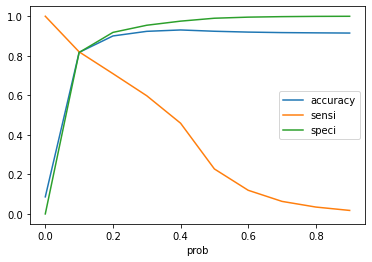

In [53]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [54]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
76985      0    0.037510   76985          0    1    0    0    0    0    0   
77814      0    0.040300   77814          0    1    0    0    0    0    0   
24787      0    0.019944   24787          0    1    0    0    0    0    0   
60192      0    0.001279   60192          0    1    0    0    0    0    0   
69896      0    0.004366   69896          0    1    0    0    0    0    0   

       0.6  0.7  0.8  0.9  final_predicted  
76985    0    0    0    0                0  
77814    0    0    0    0                0  
24787    0    0    0    0                0  
60192    0    0    0    0                0  
69896    0    0    0    0                0

In [55]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8170133764935498

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5     total_ic_mou_7  4.22
6     total_ic_mou_8  3.32
2             arpu_8  3.12
4     total_ic_mou_6  2.86
1             arpu_7  2.38
3     total_og_mou_8  1.73
0             arpu_6  1.70
8       monthly_2g_7  1.57
9       monthly_2g_8  1.57
7   total_rech_num_8  1.51
10       sachet_2g_8  1.23
11      monthly_3g_8  1.17
12       sachet_3g_8  1.16
13               aon  1.07
14        sep_vbc_3g  1.05

### Making predictions on the test set

In [57]:
X_test[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']] = scaler.fit_transform(X_test[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']])

In [58]:
X_test = X_test[col]
X_test.head()

arpu_6    arpu_7    arpu_8  total_og_mou_8  total_ic_mou_6  \
50179 -0.072948 -0.399311 -0.750409       -0.542638       -0.225296   
20587  0.056025  0.025697 -0.007731       -0.047008        0.605620   
51116  0.912687  1.059133  0.811138        0.433313        9.129258   
70628 -0.603644 -0.452694 -0.189667       -0.219381       -0.379033   
75091  0.106688 -0.735084 -0.630951       -0.687311       -0.250910   

       total_ic_mou_7  total_ic_mou_8  total_rech_num_8  monthly_2g_7  \
50179       -0.524692       -0.586591         -0.764856             0   
20587        0.580387        0.308854          0.701237             0   
51116        6.213100        5.937632         -0.241251             1   
70628       -0.194045        0.055190         -0.555414             0   
75091       -0.172399       -0.333036         -0.764856             0   

       monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8       aon  \
50179             0            0             0            0 -0.478523   
20587             0            0             0            0 -0.173779   
51116             1            0             0            0  0.750748   
70628             0            0             0            0  0.950479   
75091             0            0             0            0  1.354059   

       sep_vbc_3g  
50179   -0.128224  
20587   -0.128224  
51116   -0.128224  
70628    0.329929  
75091    1.443193

In [59]:
X_test_sm = sm.add_constant(X_test)

In [60]:
y_test_pred = res.predict(X_test_sm)

In [61]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [62]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [63]:
# Putting mobile_number to index
y_test_df['mobile_number'] = y_test_df.index

In [64]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [65]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [66]:
y_pred_final.head()

Churn  mobile_number             0
0      0          50179  2.345911e-01
1      0          20587  1.506013e-02
2      0          51116  1.275346e-08
3      0          70628  1.080974e-02
4      0          75091  2.151456e-02

In [67]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final[['mobile_number','Churn','Churn_Prob']]

In [68]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [69]:
y_pred_final.head()

mobile_number  Churn    Churn_Prob  final_predicted
0          50179      0  2.345911e-01                1
1          20587      0  1.506013e-02                0
2          51116      0  1.275346e-08                0
3          70628      0  1.080974e-02                0
4          75091      0  2.151456e-02                0

In [70]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8226343847179032

#### So from Logistic Regression model we get 82% Accuracy

# Decision Trees

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, stratify = y)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [74]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [75]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [76]:
pip install pydotplus

     |████████████████████████████████| 278 kB 620 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5834f119fa8b0107c035d74230b0b9005c91abba14bc2efb79a196fde1f944b7
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [77]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [78]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/graphviz/bin/'

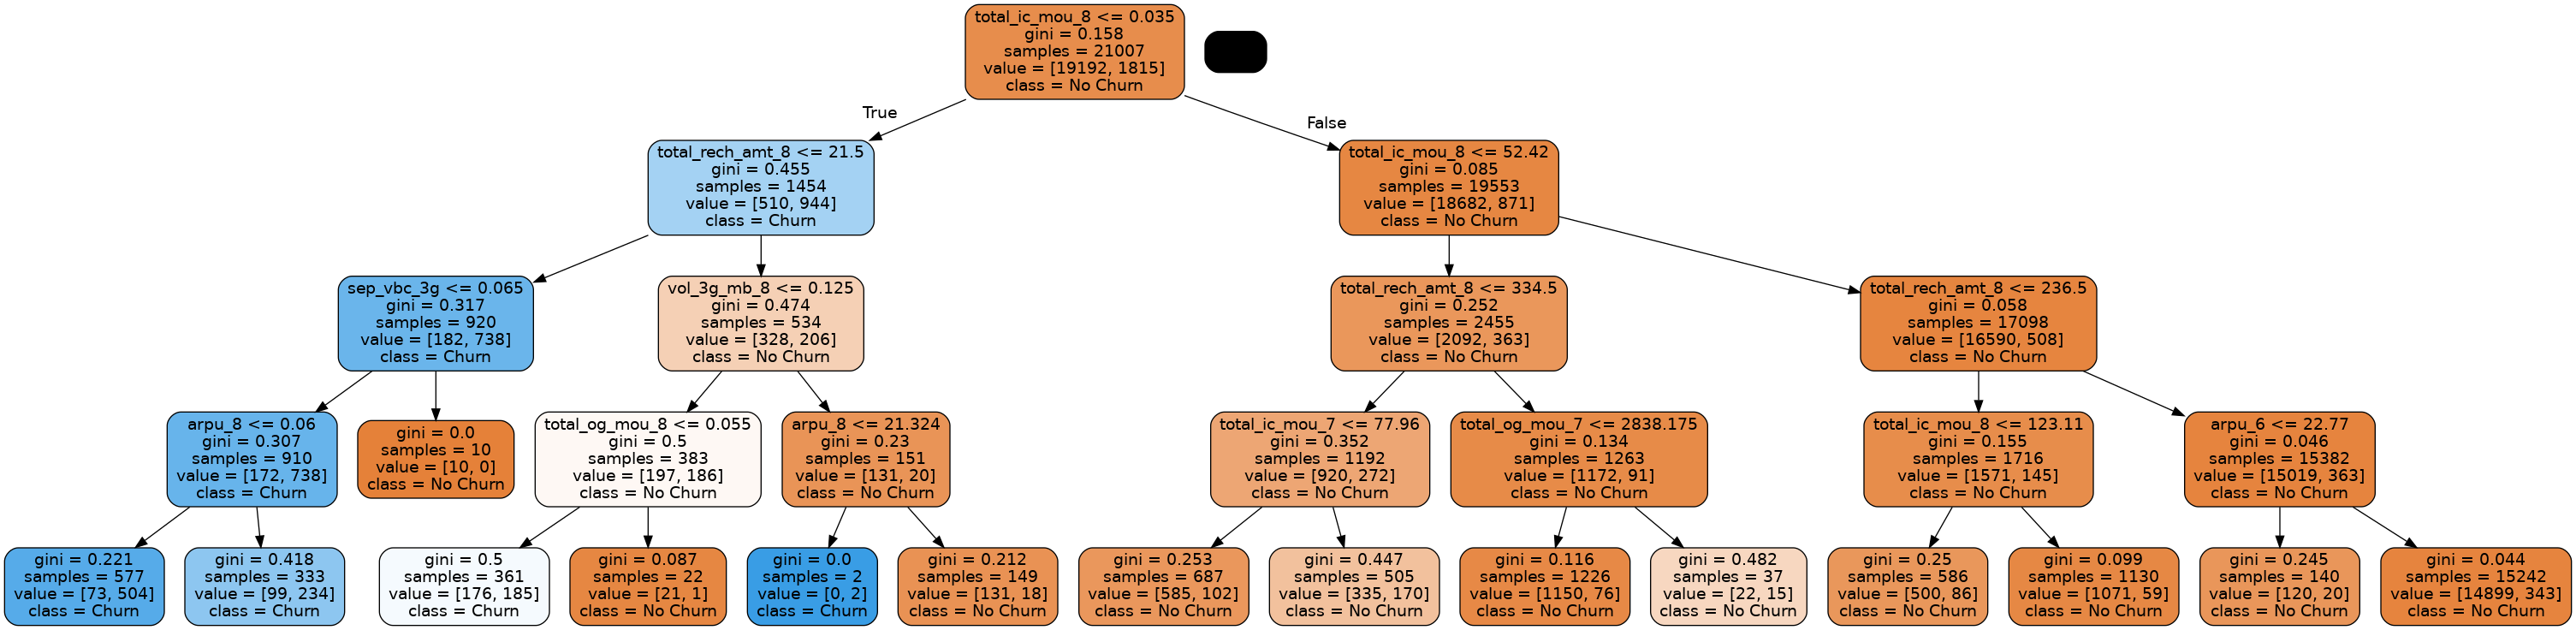

In [79]:
# plotting tree with max_depth=4
dot_data = StringIO()  

export_graphviz(dt_base, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=["No Churn", "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.71      0.50      0.59       778

    accuracy                           0.94      9004
   macro avg       0.83      0.74      0.78      9004
weighted avg       0.93      0.94      0.93      9004



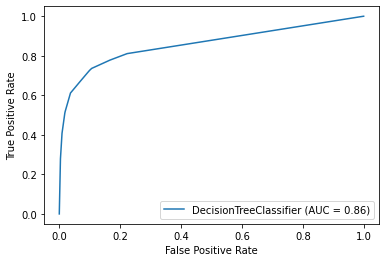

In [82]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
dt = DecisionTreeClassifier(random_state=42)

In [85]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [86]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [87]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


CPU times: user 934 ms, sys: 141 ms, total: 1.07 s
Wall time: 13 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [88]:
grid_search.best_score_

0.9400673762789606

In [89]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

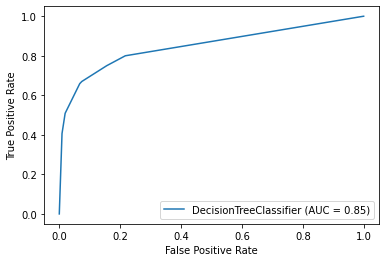

In [90]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [93]:
%%time
rf.fit(X_train, y_train)

CPU times: user 244 ms, sys: 0 ns, total: 244 ms
Wall time: 244 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [94]:
rf.oob_score_

0.937877850240396

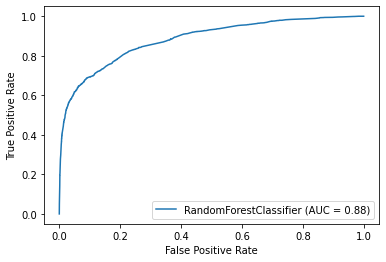

In [95]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [96]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [97]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [98]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [99]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


CPU times: user 6.68 s, sys: 246 ms, total: 6.92 s
Wall time: 3min 29s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [100]:
grid_search.best_score_

0.942019140661997

In [101]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [103]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Churn', 'No Churn'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [104]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

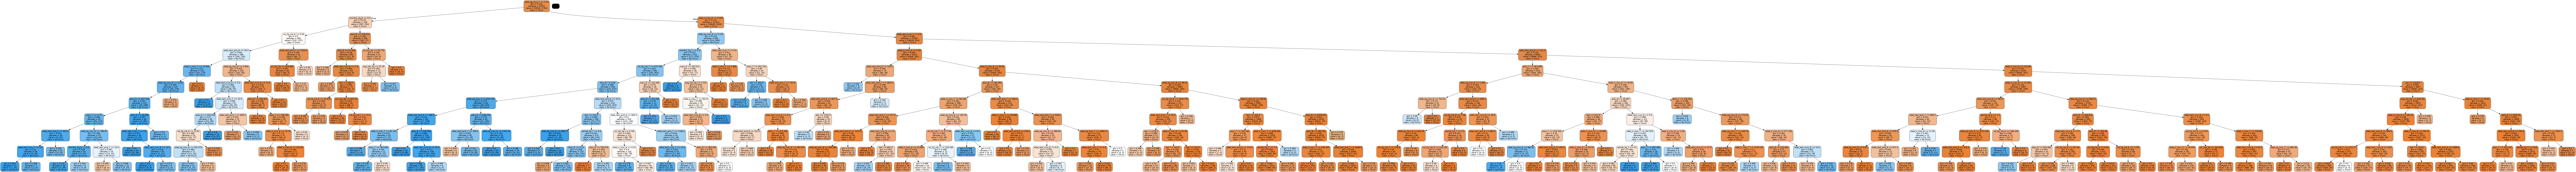

In [105]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png())

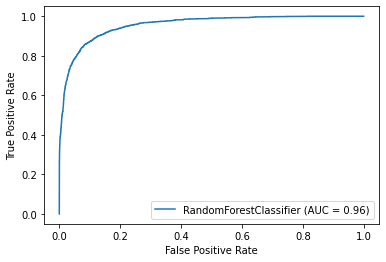

In [106]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [107]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [108]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
6     total_og_mou_8  0.237690
9     total_ic_mou_8  0.237478
3             arpu_8  0.100622
15  total_rech_amt_8  0.091657
8     total_ic_mou_7  0.033644
2             arpu_7  0.028812
5     total_og_mou_7  0.025899
12  total_rech_num_8  0.025578
14  total_rech_amt_7  0.024640
34               aon  0.019129
4     total_og_mou_6  0.017010
1             arpu_6  0.016477
21       vol_3g_mb_8  0.015711
7     total_ic_mou_6  0.015313
18       vol_2g_mb_8  0.014940
13  total_rech_amt_6  0.013722
11  total_rech_num_7  0.012435
20       vol_3g_mb_7  0.011530
10  total_rech_num_6  0.011289
17       vol_2g_mb_7  0.007074
35        aug_vbc_3g  0.006554
16       vol_2g_mb_6  0.005453
30      monthly_3g_8  0.004717
19       vol_3g_mb_6  0.004151
36        jul_vbc_3g  0.003715
37        jun_vbc_3g  0.002636
26       sachet_2g_7  0.002427
25       sachet_2g_6  0.001740
29      monthly_3g_7  0.001676
38        sep_vbc_3g  0.001205
32       sachet_3g_7  0.001037
27       sachet_2g_8  0.000999
28      monthly_3g_6  0.000836
23      monthly_2g_7  0.000801
31       sachet_3g_6  0.000649
22      monthly_2g_6  0.000388
24      monthly_2g_8  0.000306
33       sachet_3g_8  0.000061
0          circle_id  0.000000

# Conclusion

With Random Forest we get AUC as 0.99 which concludes that Random Forest is the best fit model for it. 

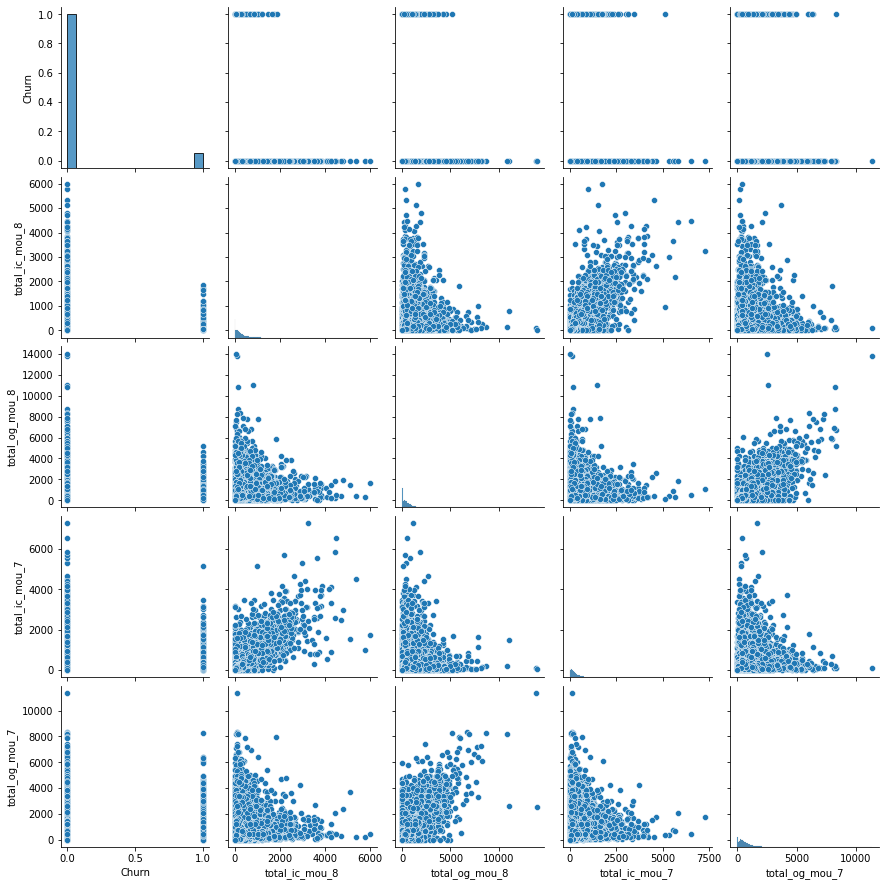

In [109]:
sns.pairplot(data[['Churn','total_ic_mou_8','total_og_mou_8','total_ic_mou_7','total_og_mou_7']])
plt.show()

Observation: 1.) We can see that total_ic_mou_7 have correlation with total_ic_mou_8 and similarly total_og_mou_7 have                          correlation with total_og_mou_8.
             2.) From the churn graphs we can say that churned customers toal outgoing and total incoming is decreasing from                    month 7th to 8th.


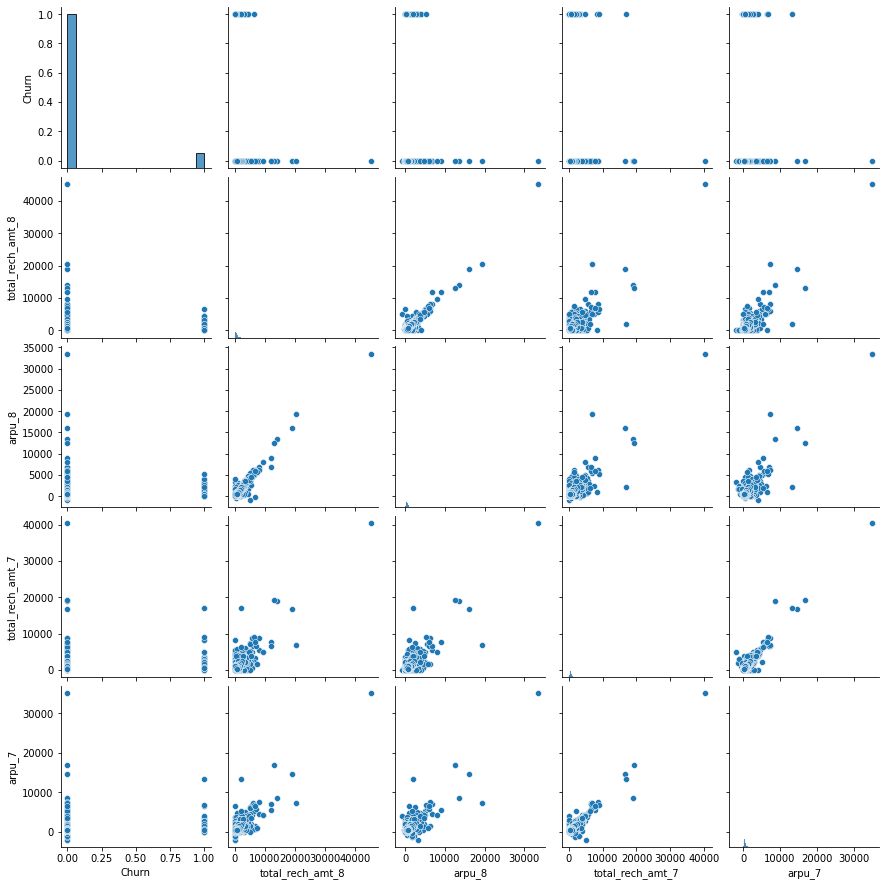

In [110]:

sns.pairplot(data[['Churn','total_rech_amt_8','arpu_8','total_rech_amt_7','arpu_7']])
plt.show()

Observation: From the obseravtion we can say that Average revenue per user for anymonth is correlated with total recharge                    amount of that month.

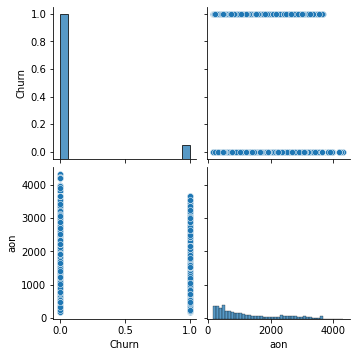

In [111]:
sns.pairplot(data[['Churn','aon']])
plt.show()

Obseravtion: From the observation we can say that age on network of customers who are churning and not churning are                          diversified. And high value customers ranges between 1 to 10 years.

Recommend Strategies to Manage Customer Churn:

1.) As we can predict the churning of high value customers from 7th month itself from the downward trend in incoming and outgoing call, so we can start giving other benefits of free calls or internet pack to them so that churning will not happen in the 9th month.

2.) We can make different monthly packages for the old customers.
